# Bharat Intern Internship

## Task 3 : Number Recognition
### - by Fena Jain

### Introduction:

In today's digital era, the ability to automatically read and interpret handwriting has become increasingly valuable. Handwriting recognition systems have numerous applications, ranging from digit recognition in automated forms processing to assisting individuals with reading difficulties. Developing a neural network that can accurately read handwriting is a challenging yet exciting task in the field of machine learning.

To embark on this journey, we will start with the MNIST Handwritten Digit Classification Challenge. The MNIST dataset is widely recognized as the benchmark dataset for handwritten digit recognition. It consists of a vast collection of grayscale images, each representing a handwritten digit from 0 to 9. By utilizing this dataset, we can train and evaluate our neural network model to accurately recognize and classify these handwritten digits.

To implement the neural network, we will leverage Tensorflow, a popular and powerful open-source machine learning framework. Tensorflow provides a comprehensive set of tools and functions for building, training, and deploying deep learning models. Its flexibility and scalability make it an ideal choice for developing complex neural networks, such as convolutional neural networks (CNNs) that excel in image recognition tasks.

The methodology for our project will involve constructing a CNN architecture using Tensorflow. CNNs are particularly effective for image recognition tasks due to their ability to automatically learn relevant features directly from the raw image data. The convolutional layers in the network apply a series of filters to extract spatial hierarchies of features, while the pooling layers reduce spatial dimensions and enhance computational efficiency. Fully connected layers at the end of the network utilize the extracted features to classify the input images into their respective digit categories.

During the training phase, we will optimize the network's performance by fine-tuning its parameters using techniques like stochastic gradient descent (SGD) and backpropagation. We will also explore techniques such as dropout and regularization to prevent overfitting and improve generalization. The evaluation of the model will be done using appropriate performance metrics, such as accuracy, precision, and recall, to assess its ability to correctly classify handwritten digits.

By undertaking this project, we aim to develop a robust neural network model that can read and interpret handwriting accurately. The combination of the MNIST dataset, Tensorflow, and CNNs provides us with the necessary tools and resources to achieve this goal. Through our implementation and experimentation, we hope to gain valuable insights into the intricacies of deep learning for image recognition and contribute to the advancement of handwriting recognition technology.

### Methodology

Methodology:

1. Dataset Loading and Visualization:
   - Import the necessary libraries for array-handling and plotting, including NumPy and Matplotlib.
   - Load the MNIST dataset using the `mnist.load_data()` function from Keras.
   - Visualize a sample of the dataset by displaying a subset of the handwritten digit images using Matplotlib.

2. Data Preprocessing:
   - Reshape the input images from 2D (28x28 pixels) to 1D arrays (784 pixels) to match the input shape expected by the neural network.
   - Convert the data type of the images to float32 and normalize the pixel values to a range of 0 to 1 by dividing them by 255.

3. Data Analysis and Preparation:
   - Print the shapes of the training and testing data arrays to verify their dimensions.
   - Check the number of unique classes in the training set using `np.unique()`.
   - Perform one-hot encoding on the class labels using `np_utils.to_categorical()` from Keras to convert them into binary vectors.

4. Neural Network Model Construction:
   - Build a sequential model using Keras.
   - Add dense layers to the model with 512 units, employing ReLU activation functions and dropout regularization.
   - Include a final dense layer with 10 units (corresponding to the number of classes) and a softmax activation function.

5. Model Compilation:
   - Compile the sequential model using categorical cross-entropy as the loss function, 'adam' optimizer, and accuracy as the metric.

6. Model Training:
   - Fit the compiled model to the preprocessed training data and labels using `model.fit()`.
   - Specify the batch size, number of epochs, and enable verbose mode to track the training progress.
   - Provide the preprocessed testing data and labels as the validation data to evaluate the model's performance during training.

7. Model Saving and Evaluation:
   - Save the trained model in the desired directory using `model.save()`.
   - Evaluate the trained model on the testing set using `model.evaluate()`, which provides the loss and accuracy metrics.

8. Prediction and Visualization:
   - Load the saved model using `load_model()` from Keras.
   - Make predictions on the testing set using `model.predict()` and extract the predicted classes.
   - Identify the correctly classified and incorrectly classified samples by comparing the predicted classes with the true labels.
   - Visualize a subset of correctly classified and incorrectly classified samples using Matplotlib.

By following this methodology, you can develop a neural network model using TensorFlow, Keras, and CNNs to successfully classify handwritten digits from the MNIST dataset. The steps involve data loading, preprocessing, model construction, compilation, training, saving, evaluation, and result visualization.

### Importing required libraries

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Loading & Splitting of dataset

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

<AxesSubplot:ylabel='count'>

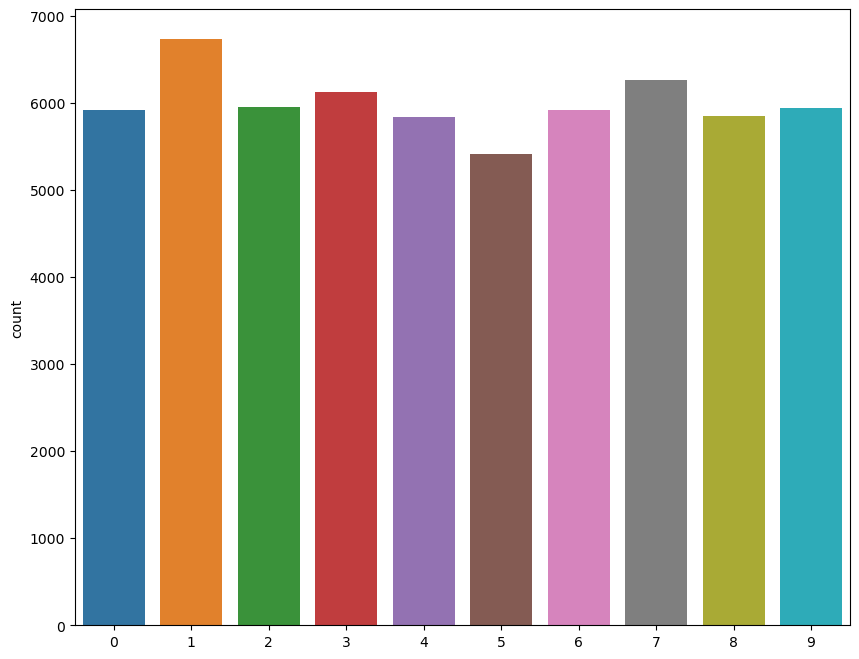

In [3]:
plt.figure(figsize=(10, 8))
sns.countplot(x=y_train)

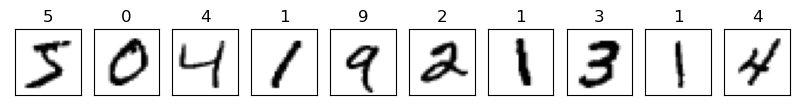

In [4]:
fig, axes = plt.subplots(ncols=10, sharex=False,
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [5]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

### Model Building & Testing

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [9]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.7,
                  epochs=10)

Epoch 1/10
563/563 [==============================] - 207s 365ms/step - loss: 0.5074 - accuracy: 0.8526 - val_loss: 0.2169 - val_accuracy: 0.9327
Epoch 2/10
563/563 [==============================] - 201s 357ms/step - loss: 0.1663 - accuracy: 0.9509 - val_loss: 0.1520 - val_accuracy: 0.9590
Epoch 3/10
563/563 [==============================] - 194s 345ms/step - loss: 0.1296 - accuracy: 0.9602 - val_loss: 0.0909 - val_accuracy: 0.9760
Epoch 4/10
563/563 [==============================] - 191s 340ms/step - loss: 0.1028 - accuracy: 0.9677 - val_loss: 0.0894 - val_accuracy: 0.9783
Epoch 5/10
563/563 [==============================] - 201s 356ms/step - loss: 0.0904 - accuracy: 0.9719 - val_loss: 0.1057 - val_accuracy: 0.9775
Epoch 6/10
563/563 [==============================] - 202s 358ms/step - loss: 0.0834 - accuracy: 0.9753 - val_loss: 0.0959 - val_accuracy: 0.9800
Epoch 7/10
563/563 [==============================] - 192s 341ms/step - loss: 0.0716 - accuracy: 0.9780 - val_loss: 0.1059 -

In [11]:
model.save('MNproject.h5')

In [12]:
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

In [13]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 12s 38ms/step - loss: 8.6411 - accuracy: 0.9769
Test Loss 8.641132354736328
Test Accuracy 0.9768999814987183


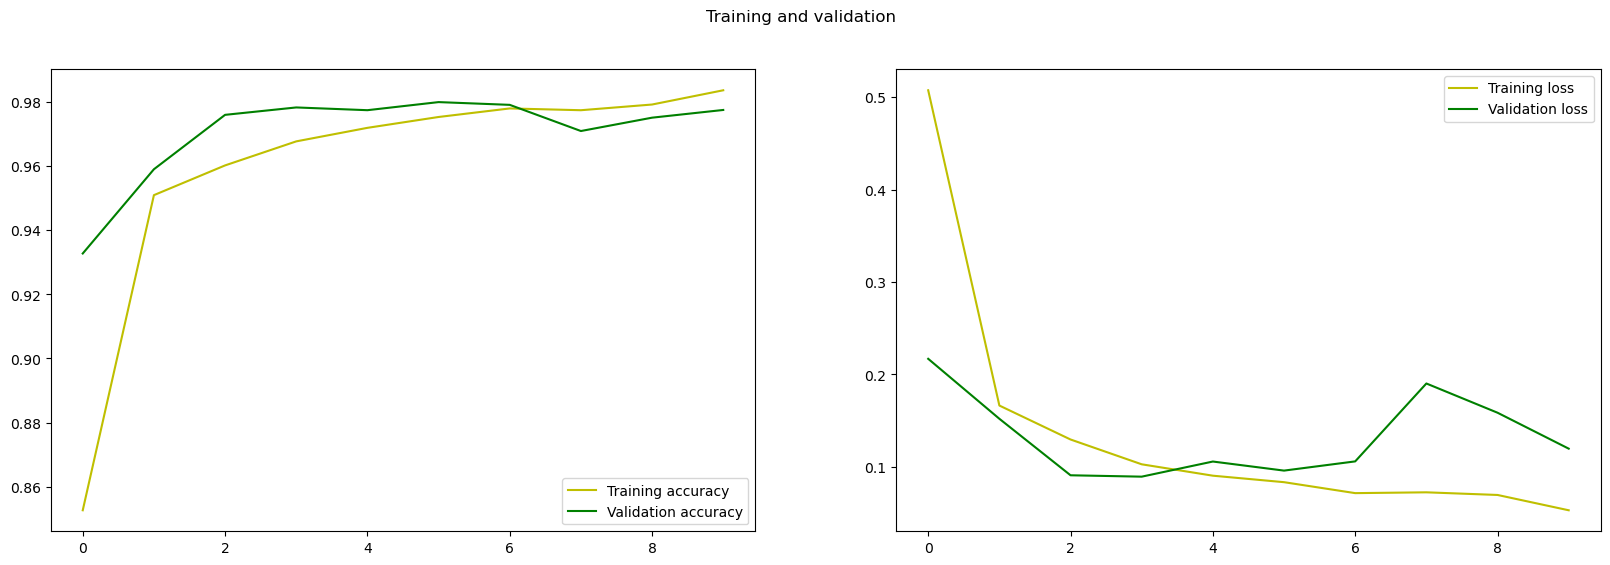

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [15]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 12s 38ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    0,    0,    0,    2,    0,    3,    1],
       [   0, 1055,   12,    1,   13,    3,    4,    3,   44,    0],
       [   0,    0, 1025,    0,    2,    0,    0,    2,    3,    0],
       [   0,    0,    6,  999,    0,    1,    0,    0,    4,    0],
       [   0,    0,    1,    0,  969,    0,    1,    0,    5,    6],
       [   3,    0,    0,   10,    0,  865,    9,    1,    4,    0],
       [   8,    0,    3,    0,    6,    1,  937,    0,    3,    0],
       [   0,    0,   20,    2,    2,    0,    0, 1002,    2,    0],
       [   3,    0,    3,    0,    0,    0,    0,    1,  967,    0],
       [  11,    0,    0,    1,    9,    0,    1,    1,   10,  976]])>

Text(95.72222222222221, 0.5, 'Truth')

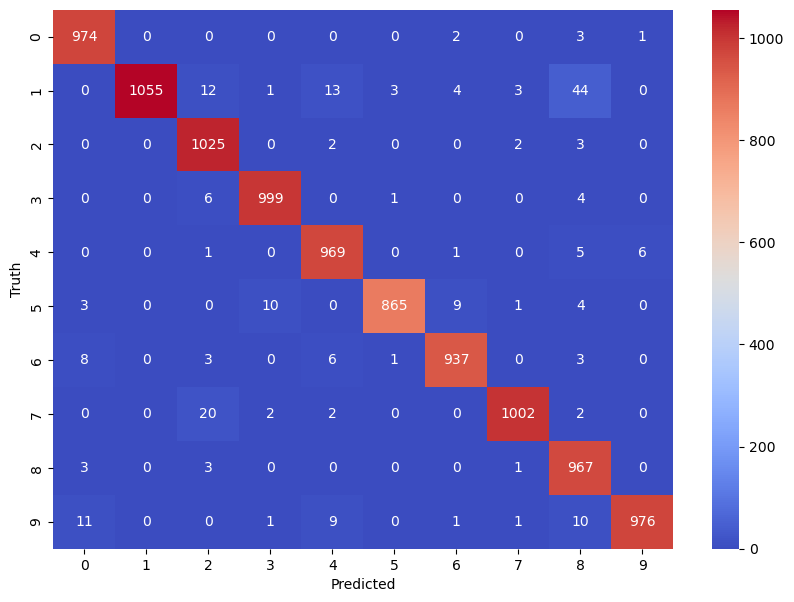

In [16]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

313/313 [==============================] - 12s 38ms/step
Predicted Value:  1
Successful prediction


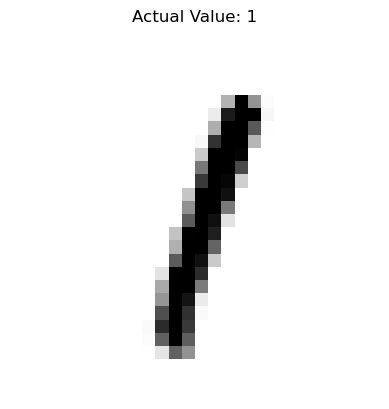

In [17]:
plt.imshow(x_test[5],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[5]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[5]))
if(y_test[5]==(np.argmax(prediction[5]))):
    print('Successful prediction')
else:
    print('Unsuccessful prediction')

313/313 [==============================] - 12s 40ms/step
Predicted Value:  0
Successful prediction


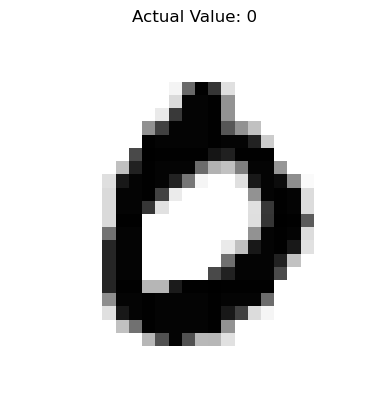

In [18]:
plt.imshow(x_test[3],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[3]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[3]))
if(y_test[3]==(np.argmax(prediction[3]))):
    print('Successful prediction')
else:
    print('Unsuccessful prediction')